In [3]:
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import datasets, layers, models


In [4]:
def plot_loss_accuracy(history):
    '''
    A function to plot train and validation loss against epochs of training
    '''
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')
    plt.ylim([min(plt.ylim()),1])
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Cross Entropy')
    plt.ylim([0,5.0])
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

In [7]:
# using ImageDataGenerator to load data from the disk
# TODO : try if inverting white and black in dataset images has any effect on the performance of the model

train_data_path = 'gurumukhi_digits_dataset/train'
val_data_path = 'gurumukhi_digits_dataset/val'

IMAGE_SIZE = 32
IMAGE_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 1) # 3 channels
NUM_OF_CLASSES = 10

train_image_generator = ImageDataGenerator( rescale=1./255 )
val_image_generator = ImageDataGenerator( rescale=1./255 )

train_data_gen = train_image_generator.flow_from_directory(
    train_data_path, 
    target_size=(IMAGE_SIZE, IMAGE_SIZE), 
    color_mode='grayscale', # for 1 channel images
    class_mode='sparse', # labels will be integers
    batch_size=32, 
    shuffle=True, 
    seed=None,
    )

val_data_gen = val_image_generator.flow_from_directory(
    val_data_path, 
    target_size=(IMAGE_SIZE, IMAGE_SIZE), 
    color_mode='grayscale', # for 1 channel images
    class_mode='sparse', # labels will be integers
    batch_size=32, 
    shuffle=True, 
    seed=None,
    )


Found 1000 images belonging to 10 classes.
Found 178 images belonging to 10 classes.


shape of a batch given by image data generator : (32, 32, 32)


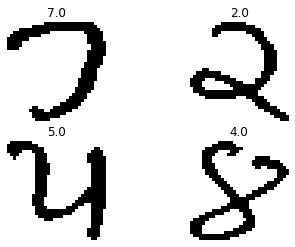

In [8]:
# checking/ validating some images generated by datagenerator

# This function will plot 4 images along with their labels.
def plotImages(image_datas,y_list):
    f, axarr = plt.subplots(2,2)
    axarr[0,0].imshow(image_datas[0], cmap='gray')
    axarr[0,0].set_title(y_list[0])
    axarr[0,0].axis('off')
    axarr[0,1].imshow(image_datas[1], cmap='gray')
    axarr[0,1].set_title(y_list[1])
    axarr[0,1].axis('off')
    axarr[1,0].imshow(image_datas[2], cmap='gray')
    axarr[1,0].set_title(y_list[2])
    axarr[1,0].axis('off')
    axarr[1,1].imshow(image_datas[3], cmap='gray')
    axarr[1,1].set_title(y_list[3])
    axarr[1,1].axis('off')

sample_training_images, y_list = next(train_data_gen)
sample_training_images = np.squeeze(sample_training_images) # to reduce dimension
print("shape of a batch given by image data generator : {}".format(sample_training_images.shape))

plotImages(sample_training_images[:4],y_list[:4])

In [9]:
# Trying a simple 1 layer NN : to get a baseline 
# TODO : make some variables to define learning rate, optimizer, etc. 

def create_1_layer_NN():
    model = tf.keras.models.Sequential([
        layers.Flatten(input_shape = IMAGE_SHAPE),
        layers.Dense(NUM_OF_CLASSES, activation='softmax') 
    ])

    model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

    return model

In [8]:
one_layer_NN_model = create_1_layer_NN()
one_layer_NN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                10250     
Total params: 10,250
Trainable params: 10,250
Non-trainable params: 0
_________________________________________________________________


In [9]:
# training

one_layer_NN_checkpoint_filepath = 'one_layer_NN/checkpoint/'
one_layer_NN_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=one_layer_NN_checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

one_layer_NN_model_history = one_layer_NN_model.fit(train_data_gen, epochs=30, 
                    validation_data=val_data_gen,
                    callbacks=[one_layer_NN_checkpoint_callback])

Epoch 1/30
32/32 [==============================] - 1s 34ms/step - loss: 1.5637 - accuracy: 0.5200 - val_loss: 1.0570 - val_accuracy: 0.7360
Epoch 2/30
32/32 [==============================] - 1s 27ms/step - loss: 0.5709 - accuracy: 0.8770 - val_loss: 0.6750 - val_accuracy: 0.8539
Epoch 3/30
32/32 [==============================] - 1s 31ms/step - loss: 0.3502 - accuracy: 0.9270 - val_loss: 0.5367 - val_accuracy: 0.8596
Epoch 4/30
32/32 [==============================] - 1s 24ms/step - loss: 0.2685 - accuracy: 0.9390 - val_loss: 0.4492 - val_accuracy: 0.8989
Epoch 5/30
32/32 [==============================] - 1s 22ms/step - loss: 0.2255 - accuracy: 0.9460 - val_loss: 0.4204 - val_accuracy: 0.8933
Epoch 6/30
32/32 [==============================] - 1s 24ms/step - loss: 0.1949 - accuracy: 0.9500 - val_loss: 0.3592 - val_accuracy: 0.9101
Epoch 7/30
32/32 [==============================] - 1s 31ms/step - loss: 0.1575 - accuracy: 0.9700 - val_loss: 0.3255 - val_accuracy: 0.9213
Epoch 8/30
32

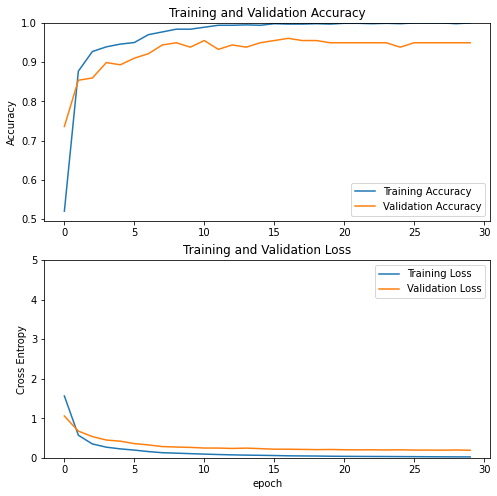

In [10]:
plot_loss_accuracy(one_layer_NN_model_history)

## Observations with 1 layer NN (i.e. no hidden layer)
* Training accuracy reaches 100% 
* validation accuracy reaches 95%

Clear **overfitting** : with training accuracy reaching 100% while validation accuracy hovers around 94%

In [11]:
# checking the model with saved weights by evaluating on validation data
one_layer_NN_checkpoint_filepath = 'one_layer_NN/checkpoint/'

one_layer_NN_model.load_weights(one_layer_NN_checkpoint_filepath)
one_layer_NN_model.evaluate(val_data_gen)

6/6 [==============================] - 0s 44ms/step - loss: 0.2166 - accuracy: 0.9607


[0.21663141250610352, 0.9606741666793823]

Choosing best weights for the model gives validation accuracy  96.07 %
* Not bad but can be improved

In [25]:
# Trying NN with 1 hidden layer

def create_1_hidden_layer_NN():
    model = tf.keras.models.Sequential([
        layers.Flatten(input_shape = IMAGE_SHAPE),
        layers.Dense(128, activation='relu'),
        layers.Dense(NUM_OF_CLASSES, activation='softmax') 
    ])

    model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

    return model

In [21]:
one_hidden_layer_NN = create_1_hidden_layer_NN()
one_hidden_layer_NN.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                5130      
Total params: 529,930
Trainable params: 529,930
Non-trainable params: 0
_________________________________________________________________


In [22]:
# training

one_hidden_layer_NN_checkpoint_filepath = 'one_hidden_layer_NN/checkpoint/'
one_hidden_layer_NN_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=one_hidden_layer_NN_checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

one_hidden_layer_NN_history = one_hidden_layer_NN.fit(train_data_gen, epochs=50, 
                    validation_data=val_data_gen,
                    callbacks=[one_hidden_layer_NN_checkpoint_callback])

Epoch 1/50
32/32 [==============================] - 1s 30ms/step - loss: 0.7981 - accuracy: 0.7830 - val_loss: 0.4004 - val_accuracy: 0.9045
Epoch 2/50
32/32 [==============================] - 1s 28ms/step - loss: 0.1960 - accuracy: 0.9440 - val_loss: 0.3407 - val_accuracy: 0.9101
Epoch 3/50
32/32 [==============================] - 1s 25ms/step - loss: 0.1045 - accuracy: 0.9750 - val_loss: 0.2357 - val_accuracy: 0.9438
Epoch 4/50
32/32 [==============================] - 1s 24ms/step - loss: 0.0745 - accuracy: 0.9780 - val_loss: 0.2325 - val_accuracy: 0.9551
Epoch 5/50
32/32 [==============================] - 1s 23ms/step - loss: 0.0392 - accuracy: 0.9910 - val_loss: 0.3023 - val_accuracy: 0.9270
Epoch 6/50
32/32 [==============================] - 1s 26ms/step - loss: 0.0467 - accuracy: 0.9900 - val_loss: 0.2005 - val_accuracy: 0.9438
Epoch 7/50
32/32 [==============================] - 1s 27ms/step - loss: 0.0230 - accuracy: 0.9970 - val_loss: 0.1975 - val_accuracy: 0.9382
Epoch 8/50
32

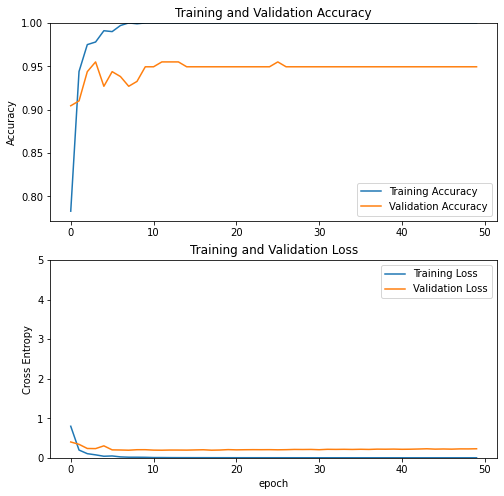

In [26]:
plot_loss_accuracy(one_hidden_layer_NN_history)

In [27]:

one_hidden_layer_NN_checkpoint_filepath = 'one_hidden_layer_NN/checkpoint/'

one_hidden_layer_NN.load_weights(one_hidden_layer_NN_checkpoint_filepath)
one_hidden_layer_NN.evaluate(val_data_gen)

6/6 [==============================] - 0s 32ms/step - loss: 0.2325 - accuracy: 0.9551


[0.23249538242816925, 0.9550561904907227]

## Observations for 1 hidden layer NN :

Hidden layer with 5 units : 
* Model is not learning : heavy underfitting
* Training accuracy : 10%

Hidden layer with 10 units :
* Better learner than the one with 5 units
* But overfitting : Training accuracy reaches 100% while validation accuracy hovers around 91%
* Worse performer than 1-Layer-NN with no hidden layer

Hidden layer with 16 units :
* Performs better than the one with 10 units
* Less overfitting than the one with 10 units : Training accuracy reaches 100% while validation accuracy hovers around 95%
* Still no improvement over 1-Layer-NN with no hidden layer

Hidden layer with >16 units :
* Performs similar to the one with 16 units
* All overfitting : as order of learnable parameters exceed far more than the training data



 

In [28]:
# now trying NN with multiple hidden layers

def create_multi_hidden_layer_NN():
    model = tf.keras.models.Sequential([
        layers.Flatten(input_shape = IMAGE_SHAPE),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(NUM_OF_CLASSES, activation='softmax') 
    ])

    model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

    return model

In [29]:
multi_hidden_layer_NN = create_multi_hidden_layer_NN()
multi_hidden_layer_NN.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                65600     
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_10 (Dense)             (None, 10)                330       
Total params: 68,010
Trainable params: 68,010
Non-trainable params: 0
_________________________________________________________________


In [30]:
# training

multi_hidden_layer_NN_checkpoint_filepath = 'multi_hidden_layer_NN/checkpoint/'
multi_hidden_layer_NN_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=multi_hidden_layer_NN_checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

multi_hidden_layer_NN_checkpoint_filepath_history = multi_hidden_layer_NN.fit(train_data_gen, epochs=50, 
                    validation_data=val_data_gen,
                    callbacks=[multi_hidden_layer_NN_checkpoint_callback])

Epoch 1/50
32/32 [==============================] - 1s 27ms/step - loss: 1.6556 - accuracy: 0.4700 - val_loss: 1.1768 - val_accuracy: 0.6854
Epoch 2/50
32/32 [==============================] - 1s 22ms/step - loss: 0.6273 - accuracy: 0.8670 - val_loss: 0.6727 - val_accuracy: 0.7921
Epoch 3/50
32/32 [==============================] - 1s 21ms/step - loss: 0.3199 - accuracy: 0.9210 - val_loss: 0.5658 - val_accuracy: 0.8371
Epoch 4/50
32/32 [==============================] - 1s 22ms/step - loss: 0.1842 - accuracy: 0.9650 - val_loss: 0.3528 - val_accuracy: 0.8989
Epoch 5/50
32/32 [==============================] - 1s 21ms/step - loss: 0.1298 - accuracy: 0.9720 - val_loss: 0.3520 - val_accuracy: 0.9045
Epoch 6/50
32/32 [==============================] - 1s 22ms/step - loss: 0.1193 - accuracy: 0.9700 - val_loss: 0.2626 - val_accuracy: 0.9213
Epoch 7/50
32/32 [==============================] - 1s 23ms/step - loss: 0.0945 - accuracy: 0.9720 - val_loss: 0.2996 - val_accuracy: 0.9213
Epoch 8/50
32

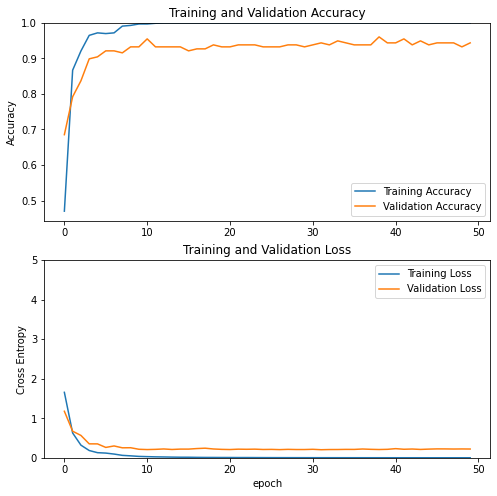

In [31]:
plot_loss_accuracy(multi_hidden_layer_NN_checkpoint_filepath_history)

In [32]:
multi_hidden_layer_NN_checkpoint_filepath = 'multi_hidden_layer_NN/checkpoint/'

multi_hidden_layer_NN.load_weights(multi_hidden_layer_NN_checkpoint_filepath)
multi_hidden_layer_NN.evaluate(val_data_gen)

6/6 [==============================] - 0s 34ms/step - loss: 0.2095 - accuracy: 0.9607


[0.20948892831802368, 0.9606741666793823]

## Observations with multi hidden layer NN : REDO THIS

Used NN with 2 to 3 hidden layers with each layer having units among {8, 16, 32, 64, 128}

*   None of them could perform better than the baseline NN with no hidden layers
*   All of them suffered from overfitting. With train accuracy 100% and validation accuracy ~95.5%
*   Performed slightly better than the NN with 1 hidden layer, but not much

### TODO
Adding distortions (like rotation, scaling, etc.) to training images might improve the performance